In [1]:
import random
import numpy as np

deck  = []

# Define the game constants
card_numbers = ['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']
card_values = {'A': 11, 'J': 10, 'Q': 10, 'K': 10}
number_of_decks = 2
marks = ['hearts', 'diamonds', 'clubs', 'spades']

def create_deck():
    # Concatenate the deck with marks
    for i in range(number_of_decks):
        for mark in marks:
            for card in card_numbers:
                #adding just value info, since marks don't matter in blackjack
                deck.append(card)  
    random.shuffle(deck)

create_deck()

In [2]:
def deal_card():
  if len(deck)==0:
    create_deck()
  return deck.pop(0)

# Define a function to make a player's move
def make_move(player, dealer_card, strategy = 'table'):
    # print("Your hand: ", player_hands[player])
    split = False
    turn_over = False
    while not turn_over:
      # action = input("h s sp d ")
      if strategy == 'table':
        action = table_strategy(player_hands[player], dealer_card)
      else:
        action = basic_strategy(player_hands[player], dealer_card)
      if action == 'd' and len(player_hands[player]) > 2:
          action = 'h'
      if action == 'sp':
        # if player already splited before, so it makes a basic strategy
        # or if there is not enough money
          if player_splited[player] or player_balances[player] < player_bets[player]*2:
              action = basic_strategy(player_hands[player], dealer_card)
          else:
              split = True;
              player_splited[player] = True
              split_hands[player].append(player_hands[player].pop(1))
              split_bets[player] = player_bets[player]
              # print("You splited hands: ", player_hands[player], split_hands[player])
      if action == 'h':
          player_hands[player].append(deal_card())
          # print("Your hand: ", player_hands[player])
          if calculate_hand_value(player_hands[player]) > 21:
              # print("You busted!")
              return -1
      if action == 's':
          # print("Your final hand: ", player_hands[player])
          turn_over = True
          break
      elif action == 'd':
          #in case of double and not enough money, the play is equal a 'hit'
          player_hands[player].append(deal_card())
          if player_balances[player] >= player_bets[player]*2:
              player_bets[player] *= 2
          else:
            pass
            # print("not enough  moeneey")
          # print("You doubled, final hand: ", player_hands[player])
          turn_over = True
          break
    if split:
      # print("split true: ", player_hands[player], split_hands[player])
      # aux = player_hands[player]
      # player_hands[player] = split_hands[player]
      # split_hands[player] = aux
      # aux = split_bets[player]
      # split_bets[player] = player_bets[player]
      # player_bets[player] = aux
      # print("split true: ", player_hands[player], split_hands[player])
      # print("bets: ", player_bets[player], split_bets[player])
      make_move(player, dealer_card)
    
    # print('overou')
    return calculate_hand_value(player_hands[player])
      
# function to print all the hands
def show_hands(dealer_hand, player_hands):
    """Prints the dealer's hand and each player's hand."""
    print("Dealer's hand:", dealer_hand)
    for i, hand in enumerate(player_hands):
        print(f"Player {i+1}'s hand:", hand)

# function to calculate the value of a hand
def calculate_hand_value(hand):
    hand_value = sum([card_values[card] if card in card_values else card for card in hand])
    num_aces = hand.count('A')
    while hand_value > 21 and num_aces > 0:
        hand_value -= 10
        num_aces -= 1
    return hand_value
                    
# function to make the dealer's moves
def make_dealer_moves(dealer_hand):
    # print("Dealer's hand: ", dealer_hand)
    while calculate_hand_value(dealer_hand) < 17:
        dealer_hand.append(deal_card())
        # print("Dealer's hand: ", dealer_hand)
    if calculate_hand_value(dealer_hand) > 21:
        # print("Dealer busted!")
        return -1
    else:
        # print("Dealer's final hand: ", dealer_hand)
        return calculate_hand_value(dealer_hand)
        
# Define a function to pay out winning bets and collect losing ones
def pay_bets(player_bets):
    
    global WINS
    global LOSSES

    dealer_value = calculate_hand_value(dealer_hand)
    #calculate the bet for each player
    for i in range(num_players):
        if player_hands[i] != []:
            player_value = calculate_hand_value(player_hands[i])
            bet = player_bets[i]
            if player_value > 21:
                won_prev[i] = 'loss'
                LOSSES[-1][i] += 1
                player_balances[i] -= bet
                # print(f"Player {i+1}: lost {bet}.")
            elif dealer_value > 21 or player_value > dealer_value:
                player_balances[i] += bet
                won_prev[i] = 'win'
                WINS[-1][i] += 1
                # print(f"Player {i+1}: won {bet}.")
            elif player_value == dealer_value:
                won_prev[i] = 'tied'
                # print(f"Player {i+1}: tied.")
            else:
                won_prev[i] = 'loss'
                LOSSES[-1][i] += 1
                player_balances[i] -= bet
                # print(f"Player {i+1}: lost {bet}.")
        #checking the case to Splited Hands bets
        if split_hands[i] != []:
            player_value = calculate_hand_value(split_hands[i])
            bet = split_bets[i]
            if player_value > 21:
                LOSSES[-1][i] += 1
                player_balances[i] -= bet
                # print(f"Player {i+1}: lost {bet}.")
            elif dealer_value > 21 or player_value > dealer_value:
                player_balances[i] += bet
                WINS[-1][i] += 1
                # print(f"Player {i+1}: won {bet}.")
            elif player_value == dealer_value:
                pass
                # print(f"Player {i+1}: tied.")
            else:
                player_balances[i] -= bet
                LOSSES[-1][i] += 1
                # print(f"Player {i+1}: lost {bet}.")

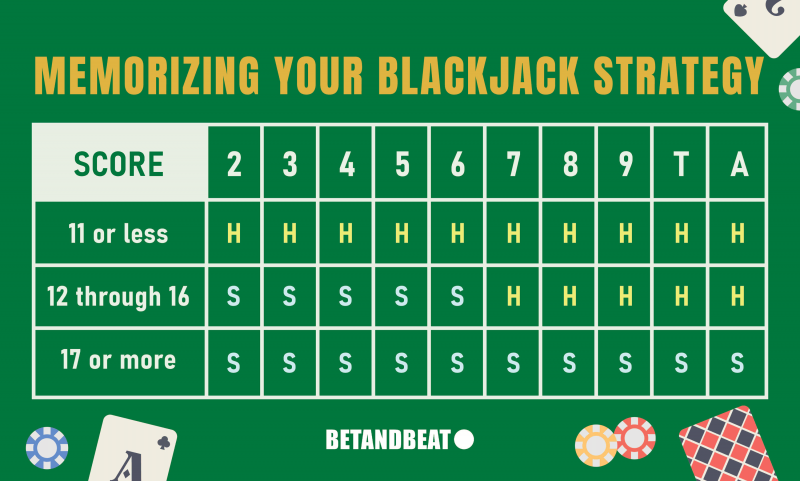

In [3]:
def basic_strategy(hand, dealer_card):
  hand_value = calculate_hand_value(hand)
  if dealer_card in card_values:
    dealer_card = card_values[dealer_card] 
  if hand_value >= 17 or (hand_value >= 12 and dealer_card < 7):
    return 's'
  else:
    return 'h'

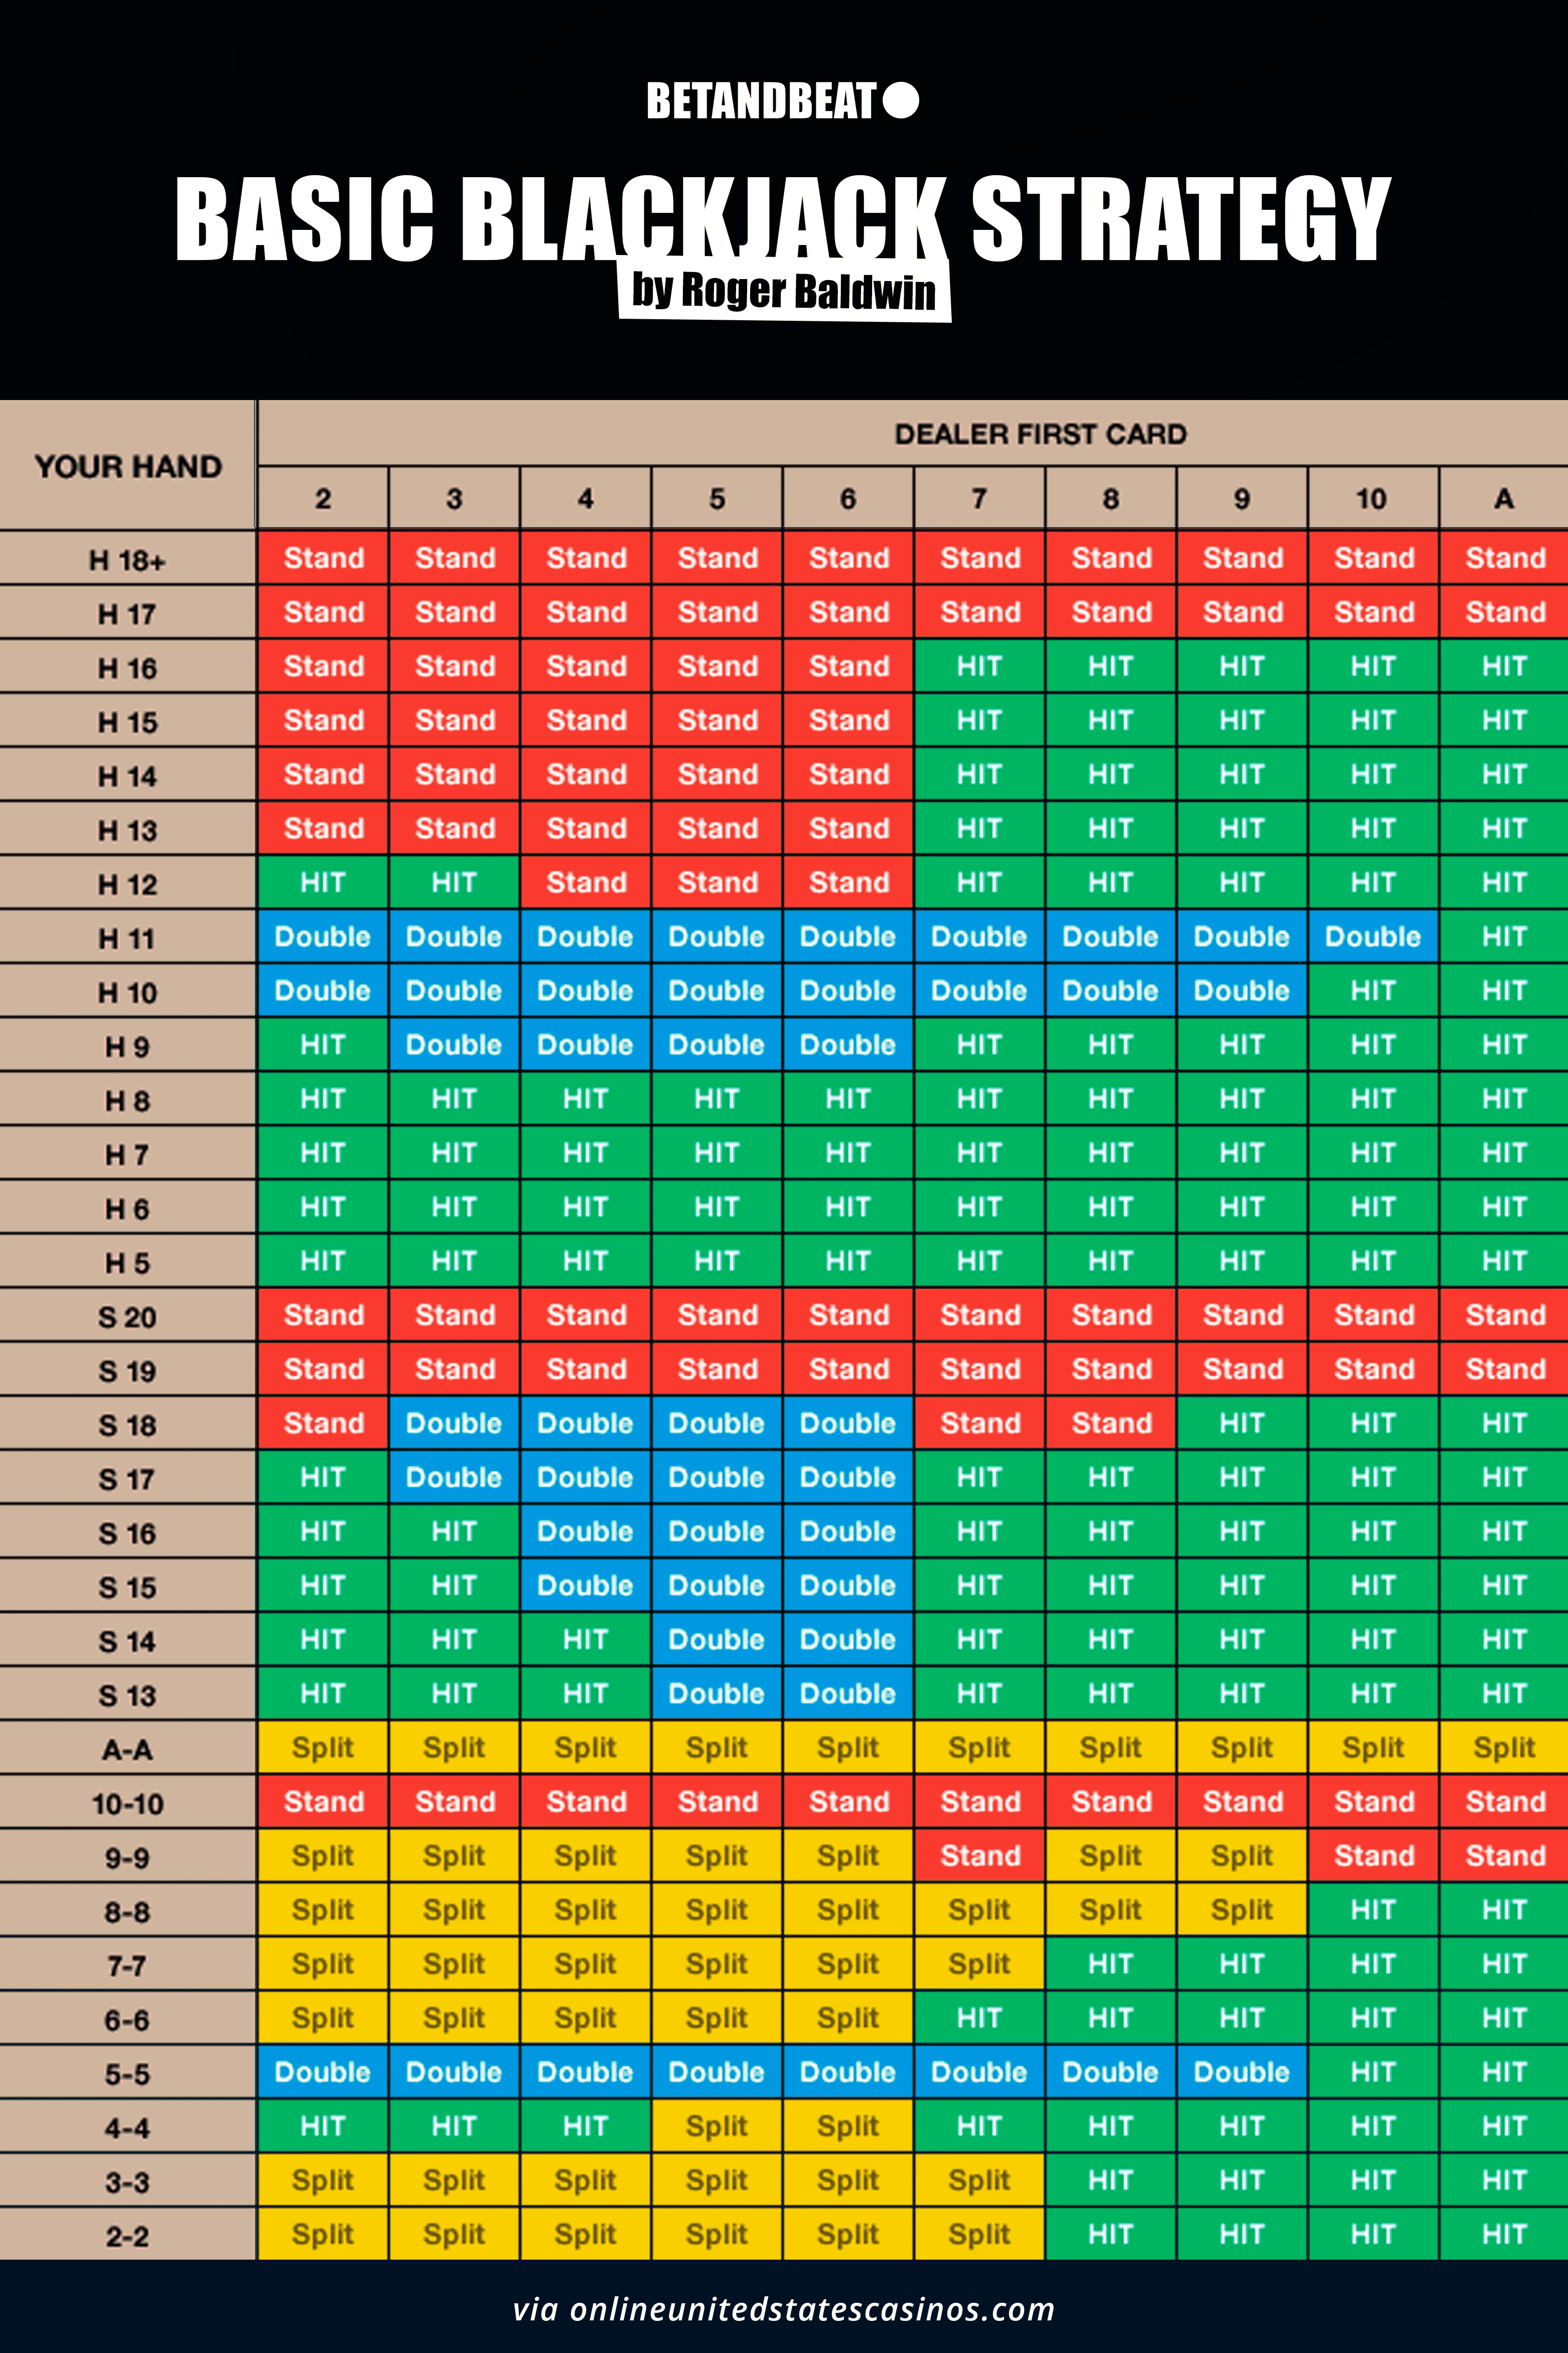

In [4]:
def table_strategy(hand, dealer_card):
  hand_value = calculate_hand_value(hand)
  if dealer_card in card_values:
    dealer_card = card_values[dealer_card] 
  #check if hand have 2+ cards (not splited before)
  if len(hand)>1:
  #in case of same card in hand
    if hand[0] == hand[1] and len(hand) == 2:
      if 'A' in hand:
        return 'sp'
      elif hand[0] in card_values:
        return 's'
      elif dealer_card >= 11:
        if 9 in hand:
          return 's'
        else:
          return 'h'
      elif 9 in hand:
        if dealer_card == 7:
          return 's'
        else:
          return 'sp'
      elif 5 in hand:
        return 'd'
      elif 8 in hand:
        return 'sp'
      elif dealer_card >= 8:
        return 'h'
      elif 4 in hand and not (dealer_card == 5 or dealer_card ==6):
        return 'h'
      elif 6 in hand and dealer_card == 7:
        return 'h'
      else:
        return 'sp'
  # in case of 'A' and another card (middle of table)
  if 'A' in hand:
    if hand_value >=19:
      return 's'
    elif dealer_card >= 9:
      return 'h'
    elif hand_value == 18:
      if dealer_card == 2 or dealer_card>6:
        return 's'
    elif dealer_card in [2,7,8]:
      return 'h'
    elif dealer_card == 3 and hand_value < 17:
      return 'h'
    elif dealer_card == 4 and hand_value < 15:
      return 'h'
    return 'd'
  # case of another cards (start of table)
  else:
    if hand_value >= 17:
      return 's'
    elif hand_value >= 12:
      if dealer_card >= 7:
        return 'h'
      elif dealer_card < 4 and hand_value == 12:
        return 'h'
      return 's'
    elif hand_value == 11 and dealer_card <= 10:
      return 'd'
    elif hand_value == 10 and dealer_card <= 9:
      return 'd'
    elif hand_value == 9 and dealer_card <= 6 and dealer_card > 2:
      return 'd'
    return 'h'
  

So, how I am not so into betting games and strategies, I asked some help to ChatGPT:

What are the most common strategies to bet?

ChatGPT:

"**There are several types of bet strategies that players may use in gambling. Here are some of the most common ones:**

*Martingale:* This is a progressive betting system where the player doubles their bet after every loss. The idea is that eventually, the player will win, and the win will cover all previous losses. However, the risk is that the player can quickly run out of money if they suffer a losing streak.

*Paroli:* This is another progressive betting system, but it involves increasing the bet after a win, rather than a loss. The player will double their bet after each win until they have reached a predetermined limit or have suffered a loss.

*D'Alembert:* This is a more conservative betting system that involves increasing the bet after a loss and decreasing it after a win. The player will add one unit to their bet after a loss and subtract one unit after a win.

*Fibonacci:* This is a betting system that involves following the Fibonacci sequence. The player will start with a bet of one unit and then bet the sum of the previous two bets after each loss. After a win, the player will move back two numbers in the sequence.

*Flat betting:* This is a simple betting strategy where the player bets the same amount on every hand or round. This strategy can be useful for minimizing losses but may not lead to significant wins.

It's important to note that no betting system can guarantee a win, and all come with inherent risks. It's crucial to set a budget and stick to it, regardless of the betting strategy employed."

In [5]:
# salvar historico de win, loss, tie
# salvar o historico do balanco
# -- maximo e minimo - do unico - media dos maximo, media dos minimo
#                           --- dp dessas make
def place_bet(balance,player_number):
    bet = 0
    if player_number == 0:
        bet = flat_bet(min_bet)
    if player_number == 1:
        bet = martingale_bet(bets_prev[player_number],won_prev[player_number],min_bet,balance)
    if player_number == 2:
        bet = paroli_bet(bets_prev[player_number],won_prev[player_number],min_bet,min_bet*5)
    if player_number == 3:
        bet = fibonacci_bet(won_prev[player_number],min_bet,balance)
    if player_number == 4:
        bet = dalembert_bet(won_prev[player_number],min_bet,2)
    # print(won_prev[player_number])
    
    if balance <= 0:
        return 0
    if bet > 0 and bet < min_bet:
        bet = min_bet
    if balance >= bet:
        return bet
    else:
        if balance >= min_bet:
            return min_bet
        else:
            #case of insufficient balance, all-in
            return 0

# Types of Bet Strategies
def martingale_bet(previous_bet, previous_result, base_bet, limit):
    '''
    Here the player doubles their bet after every loss.
    And return to the base when they win.
    Idea is to always recover the loss.
    '''
    if previous_result == 'loss':
        if previous_bet == 0:
            new_bet = base_bet
        else:
            new_bet = previous_bet * 2
        # print('new',new_bet)
        if new_bet <= limit:
            return new_bet
        else:
            return base_bet
    else:
        if previous_result == 'win':
            return base_bet
        else: #case of tie
            return previous_bet

def paroli_bet(previous_bet, previous_result, base_bet, limit):
    '''
    Here the player doubles their bet after every win.
    Return to the base after 3 wins or when they lose.
    '''
    if previous_result == 'win':
        new_bet = previous_bet * 2
        if new_bet <= limit:
            return new_bet
        else:
            return base_bet
    else:
        if previous_result == 'loss':
            return base_bet
        else: #case of tie
            return previous_bet


previous_dal_bet = 20

def dalembert_bet(previous_result, base_bet, step):
    '''
    Here the player increase or decrease 1 unit of bet.
    Increase when win, decrease when lose.
    This is a more conservative betting system.
    '''
    global previous_dal_bet
    if previous_result == 'win' and previous_dal_bet >= base_bet:
        previous_dal_bet = previous_dal_bet - step
    else:
        if previous_result == 'loss':
            previous_dal_bet = previous_dal_bet + step
        else: #case of tie
            pass
    
    return previous_dal_bet

#Auxiliar to remeber the last 2 bets of 1 Fibonacci player
previous_fib_bets = [8,13]

def fib_update_prev_bet(limit,win = True):
    global previous_fib_bets
    if win:
        previous_fib_bets = [ 
          previous_fib_bets[0] - (previous_fib_bets[1]-previous_fib_bets[0]),
                            previous_fib_bets[1]-previous_fib_bets[0]]
    else:
        previous_fib_bets.append(previous_fib_bets[1]+previous_fib_bets[0])
        previous_fib_bets.pop(0)
    if previous_fib_bets[1] < min_bet or previous_fib_bets[1]>limit:
        previous_fib_bets = [8,13]

def fibonacci_bet(previous_result, base_bet, limit):
    '''
    Here the player increase the bet every loss, following the Fibonacci seq.
    When it wins, it returns 2 numbers in the sequence.
    Idea here is to recover the losses without making high bets like Martingale.
    '''
    if previous_result == 'win':
        fib_update_prev_bet(limit)
    elif previous_result == 'loss':     
        fib_update_prev_bet(limit,False)
    return previous_fib_bets[1]

def flat_bet(base_bet):
    '''
    Player always make the same bet 
    This case 2 times the base was chosen
    '''
    return base_bet * 2

In [16]:
BALANCES = []
WINS = []
LOSSES = []
BETS = []

H_BALANCES = np.array([1000, 1000, 1000, 1000, 1000])
H_WINS = np.array([0, 0, 0, 0, 0])
H_LOSSES = np.array([0, 0, 0, 0, 0])
H_BETS = np.array([0, 0, 0, 0, 0])

#Define initial game variables
estrategies = ['conservador','outra','terceira']  
initial_money = 1000
min_bet = 10
num_players = 5
player_balances = [initial_money] * num_players

player_hands = []
dealer_hand = []
player_bets = []
split_hands = []
split_bets = []

won_prev = ['loss' for _ in range(num_players)]
bets_prev = [0 for _ in range(num_players)]
player_splited = []

rounds = 100
games = 15000

for game in range(games):
  if game%25 == 0:
    print("game loop",game)
  
  #initializing strategy bet variables
  previous_dal_bet = 2*min_bet
  previous_fib_bets = [5,8]
  won_prev = ['loss' for _ in range(num_players)] 
  bets_prev = [0 for _ in range(num_players)]

  BALANCES = []
  player_balances = [initial_money] * num_players 
  BALANCES.append(player_balances.copy())
  WINS = []
  LOSSES = []
  BETS = []
  #Main game loop
  for round in range(rounds):
    player_hands = [[] for _ in range(num_players)]
    split_hands = [[] for _ in range(num_players)]
    player_splited = [False for _ in range(num_players)]
    dealer_hand = []
    # Players place their bets
    player_bets = [place_bet(player_balances[i],i) for i in range(num_players)]
    split_bets = [0 for _ in range(num_players)]

    WINS.append([0 for _ in range(num_players)])
    LOSSES.append([0 for _ in range(num_players)])
    
    # Deal initial cards
    for i in range(2):
        for j in range(num_players):
            if player_bets[j] >= min_bet:
                player_hands[j].append(deal_card())
        dealer_hand.append(deal_card())

    # print("Dealer hand",dealer_hand[0])
    # Show dealer and players' hands
    # show_hands(dealer_hand, player_hands)

    # Each player plays their hand
    for i in range(num_players):
        if player_bets[i] >= min_bet:
            make_move(i, dealer_hand[0])
        if split_hands[i] != []:
            # swapping the splited hand in order to the function works
            aux = player_hands[i]
            player_hands[i] = split_hands[i]
            split_hands[i] = aux
            aux = split_bets[i]
            split_bets[i] = player_bets[i]
            player_bets[i] = aux

            make_move(i,dealer_hand[0])


    # Dealer plays their hand
    make_dealer_moves(dealer_hand)

    # Pay player bets
    pay_bets(player_bets)

    bets_prev = player_bets
    # Check if any player is out of chips
    # for i in range(num_players):
    #     if player_balances[i] < 0:
    #         print(f"Player {i+1} ran out of chips and lost the game!")
    #         break

    # # Ask if player wants to play again
    # play_again = input("Do you want to play again? (y/n) ")
    # if play_again.lower() != 'y':
    # break

    BETS.append([i+j for i,j in zip(player_bets,split_bets)])
    BALANCES.append(player_balances.copy())
  
  H_BALANCES = np.vstack([H_BALANCES,np.array(BALANCES.copy())])
  H_WINS = np.vstack([H_WINS,np.array(WINS.copy())])
  H_LOSSES = np.vstack([H_LOSSES,np.array(LOSSES.copy())])
  H_BETS = np.vstack([H_BETS,np.array(BETS.copy())])
print("Thanks for playing!")

game loop 0
game loop 25
game loop 50
game loop 75
game loop 100
game loop 125
game loop 150
game loop 175
game loop 200
game loop 225
game loop 250
game loop 275
game loop 300
game loop 325
game loop 350
game loop 375
game loop 400
game loop 425
game loop 450
game loop 475
game loop 500
game loop 525
game loop 550
game loop 575
game loop 600
game loop 625
game loop 650
game loop 675
game loop 700
game loop 725
game loop 750
game loop 775
game loop 800
game loop 825
game loop 850
game loop 875
game loop 900
game loop 925
game loop 950
game loop 975
game loop 1000
game loop 1025
game loop 1050
game loop 1075
game loop 1100
game loop 1125
game loop 1150
game loop 1175
game loop 1200
game loop 1225
game loop 1250
game loop 1275
game loop 1300
game loop 1325
game loop 1350
game loop 1375
game loop 1400
game loop 1425
game loop 1450
game loop 1475
game loop 1500
game loop 1525
game loop 1550
game loop 1575
game loop 1600
game loop 1625
game loop 1650
game loop 1675
game loop 1700
game loop 

In [17]:
H_BALANCES = H_BALANCES[1:]
H_WINS = H_WINS[1:]
H_LOSSES = H_LOSSES[1:]
H_BETS = H_BETS[1:]
# for balance in H_BALANCES:
#   print(balance)
# for i,balance in enumerate(H_BETS):
#   print(balance)
#   print(i)

In [18]:

with open('bets.npy', 'wb') as f:
  np.save(f, np.array(H_BETS))
with open('balances.npy', 'wb') as f:
  np.save(f, np.array(H_BALANCES))
with open('wins.npy', 'wb') as f:
  np.save(f, np.array(H_WINS))
with open('losses.npy', 'wb') as f:
  np.save(f, np.array(H_LOSSES))

In [3]:
rates = [[659892, 132602, 742506],
 [599841, 120914, 673861],
 [659004, 132513, 743367],
 [602132, 120845, 677870],
 [652303, 131487, 734319]]
for r in rates:
    total = r[0]+r[1]+r[2]
    print(r[0]*100/total)
    print(r[1]*100/total)
    print(r[2]*100/total)
    print('-----')

42.98970684039088
8.6385667752443
48.37172638436482
-----
43.01119447934055
8.670056847189477
48.318748673469976
-----
42.935101284527036
8.63342115755979
48.43147755791317
-----
42.98342360015048
8.626566641467626
48.39000975838189
-----
42.96812679458458
8.661235787417109
48.37063741799831
-----
